In [1]:
from gprm.datasets import Seafloor
import pygmt

%load_ext autoreload
%autoreload 2

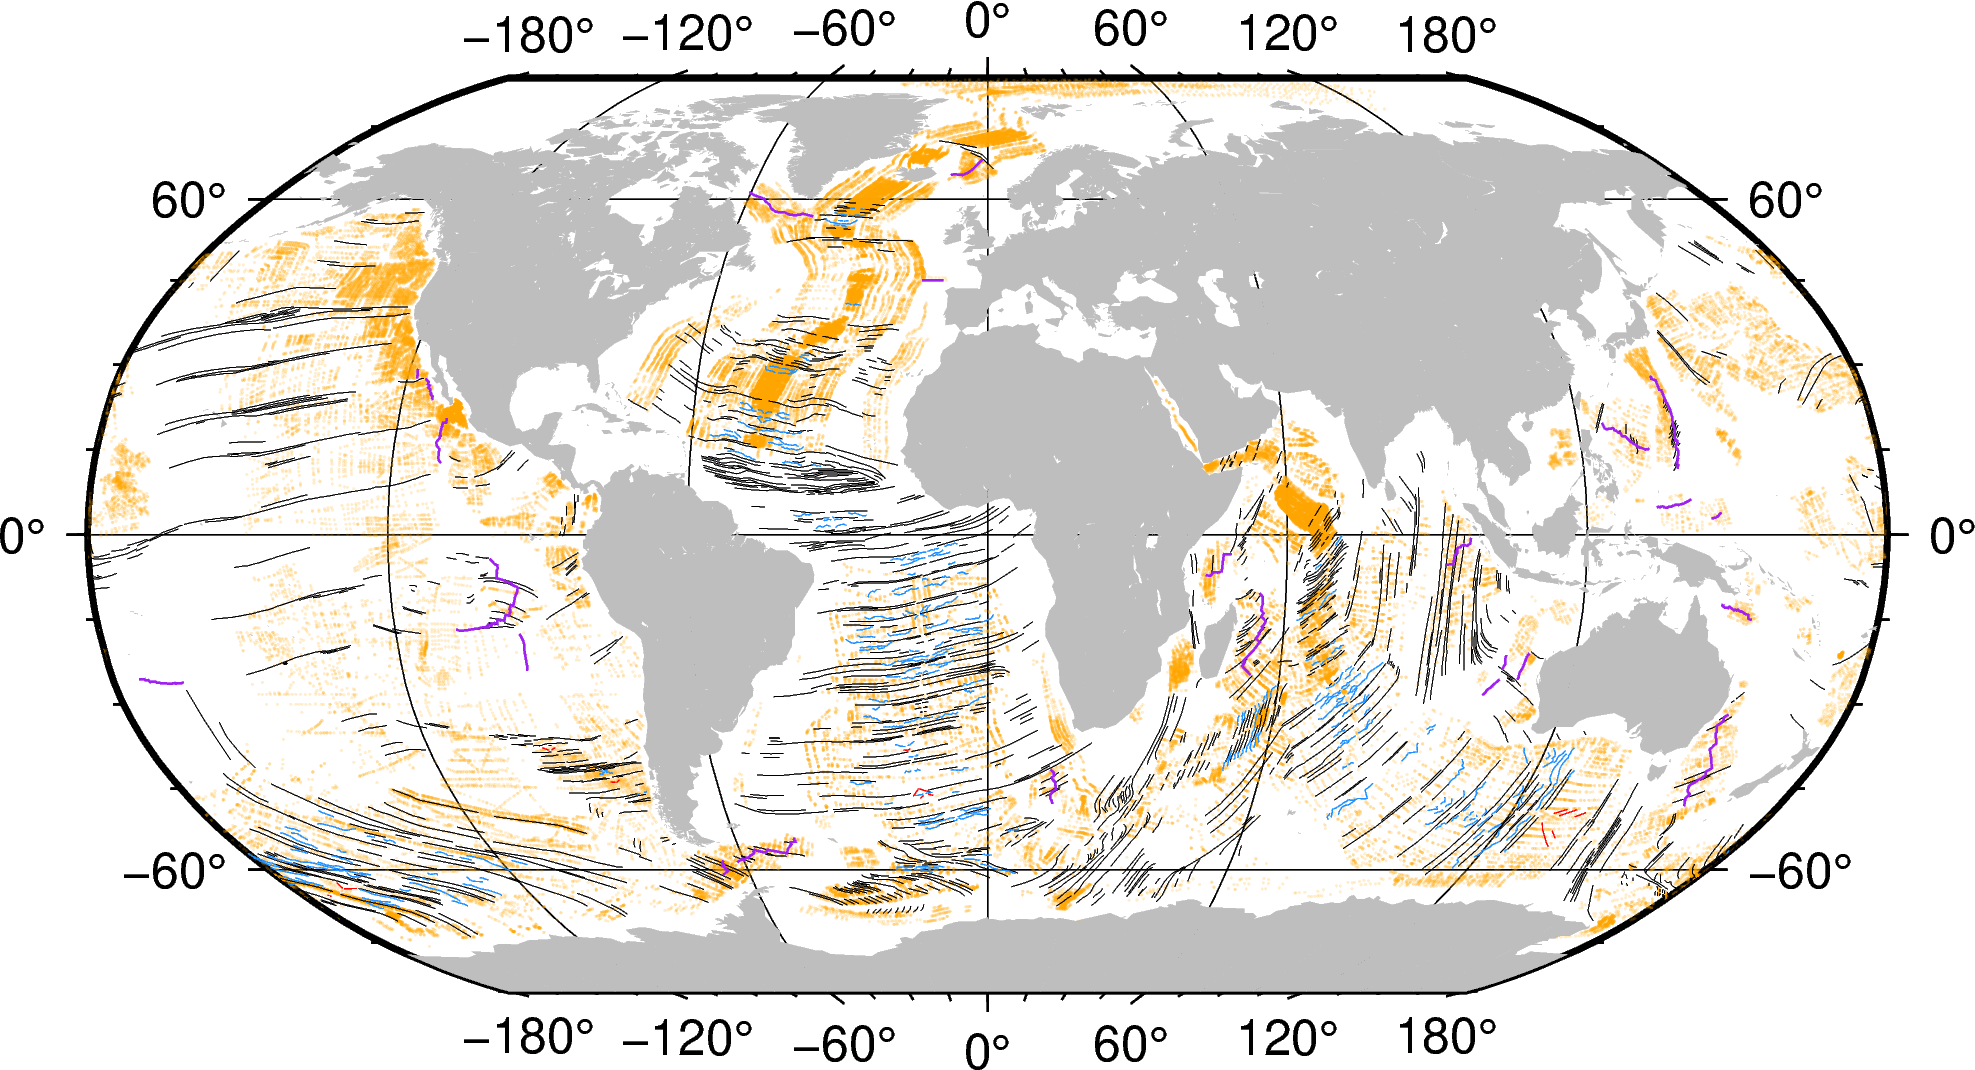

In [2]:
fig = pygmt.Figure()

fig.basemap(frame='afg', region='d', projection='N6i')

fig.coast(land='grey')
fig.plot(data=Seafloor.MagneticPicks(load=False), style='c0.02c', color='orange', transparency=80)
fig.plot(data=Seafloor.SeafloorFabric(feature_type='FZ', load=False), pen='0.1p,black')
fig.plot(data=Seafloor.SeafloorFabric(feature_type='ER', load=False), pen='0.5p,purple')
fig.plot(data=Seafloor.SeafloorFabric(feature_type='DZ', load=False), pen='0.2p,dodgerblue')
fig.plot(data=Seafloor.SeafloorFabric(feature_type='PR', load=False), pen='0.2p,red')

fig.show(width=1000)


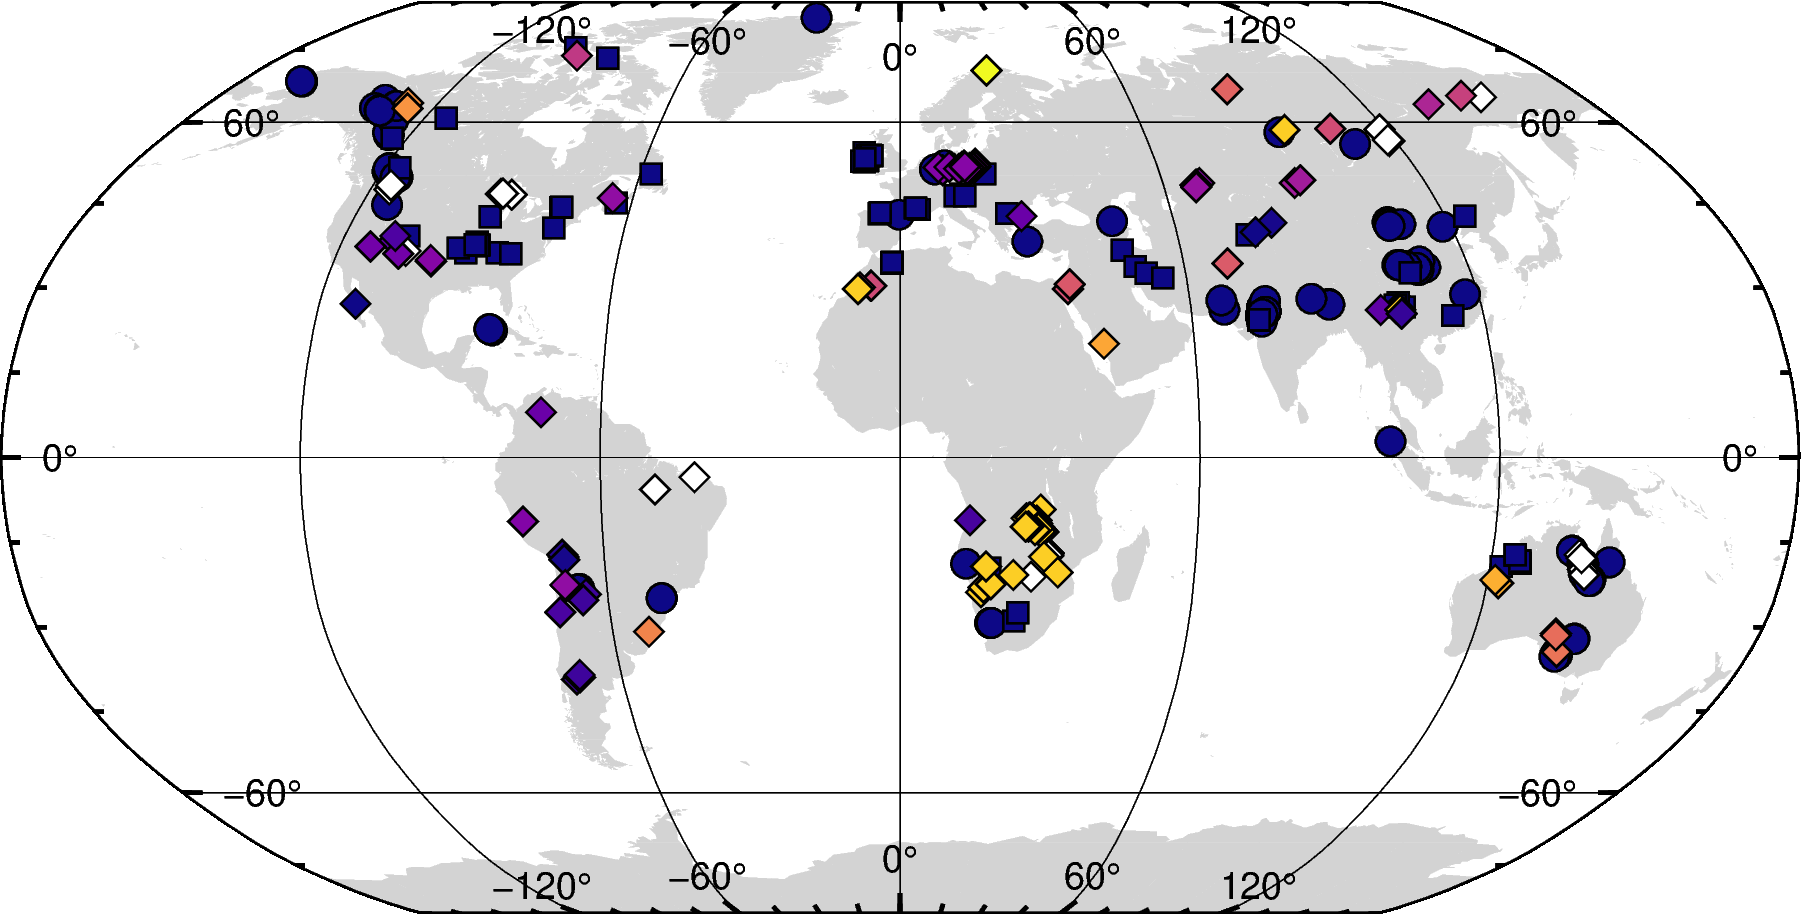

In [3]:
from gprm.datasets import Rocks


PbZn_CD = Rocks.BaseMetalDeposits('PbZn-CD')
PbZn_MVT = Rocks.BaseMetalDeposits('PbZn-MVT')
Cu_sed = Rocks.BaseMetalDeposits('Cu-sed')

fig = pygmt.Figure()
fig.coast(projection='N6i',region='d',frame='afg',land='lightgray')

fig.plot(x=PbZn_CD['Lon'], y=PbZn_CD['Lat'], 
         color=PbZn_CD['Age (Ga)'], style='c0.25c', cmap='plasma', pen='0.5p,black')
fig.plot(x=PbZn_MVT['Lon'], y=PbZn_MVT['Lat'], 
         color=PbZn_MVT['Age (Ga)'], style='s0.25c', cmap='plasma', pen='0.5p,black')
fig.plot(x=Cu_sed['Lon'], y=Cu_sed['Lat'], 
         color=Cu_sed['Age (Ga)'], style='d0.25c', cmap='plasma', pen='0.5p,black')

fig.show(width=1000)


In [4]:
print(Rocks.Geochem(return_column_names=True))


['sample_name', 'latitude', 'longitude', 'loc_prec', 'qgis_geom', 'datum', 'depth', 'material', 'rock_name', 'protolith', 'sample_description', 'density', 'comments', 'qap_name', 'sia_scheme', 'frost_class1', 'frost_class2', 'frost_class3', 'quartz', 'feldspar', 'lithics', 'facies', 'texture', 'p_velocity', 'density_model', 'heat_production', 'heat_production_mass', 'ref_id', 'iso_id', 'comp_id', 'major_id', 'trace_id', 'rgroup_id', 'age_id', 'method_id', 'country_id', 'age_min', 'age', 'age_max', 'age_sd', 'time_period_min', 'time_period', 'time_period_max', 'age_method', 'mg_number', 'fe_number', 'mali', 'asi', 'maficity', 'cia', 'wip', 'spar', 'qtzindex', 'r1', 'r2', 'rock_type', 'rb87_sr86', 'rb87_sr87', 'sr87_sr86', 'nd143_nd144', 'sm147_nd144', 'lu176_hf177', 'hf176_hf177', 're187_os186', 're187_os188', 'os187_os188', 'pb206_pb204', 'pb207_pb204', 'pb208_pb204', 'th232_pb204', 'th232_u238', 'u238_pb204', 'epsilon_hf', 'epsilon_nd', 'epsilon_sr', 'sio2', 'tio2', 'al2o3', 'cr2o3', 

In [5]:
data = Rocks.Geochem(usecols=['latitude', 'longitude', 'rock_name'])

data

,latitude,longitude,rock_name,geometry
0,-53.100000,73.800000,dacite,POINT (73.80000 -53.10000)
1,-53.150000,73.670000,phonolite,POINT (73.67000 -53.15000)
2,-53.080000,73.670000,phonolite,POINT (73.67000 -53.08000)
3,-53.150000,73.670000,phonolite,POINT (73.67000 -53.15000)
4,33.421055,130.398294,marble,POINT (130.39829 33.42106)
...,...,...,...,...
1022087,-72.500000,11.500000,charnockite,POINT (11.50000 -72.50000)
1022088,-72.500000,11.500000,charnockite,POINT (11.50000 -72.50000)
1022089,-72.500000,11.500000,charnockite,POINT (11.50000 -72.50000)
1022090,-72.500000,11.500000,charnockite,POINT (11.50000 -72.50000)


<GeoAxesSubplot:>

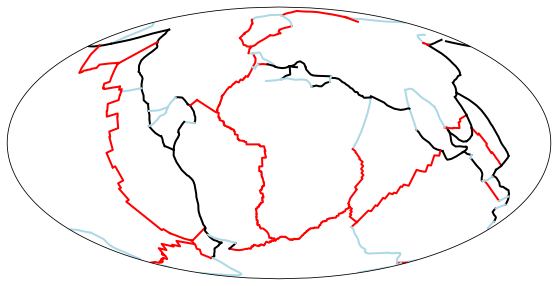

In [6]:
from gprm.datasets import Reconstructions

M2016 = Reconstructions.fetch_Muller2016()

tmp = M2016.plate_snapshot(50)
tmp.plot()

<GeoAxesSubplot:>

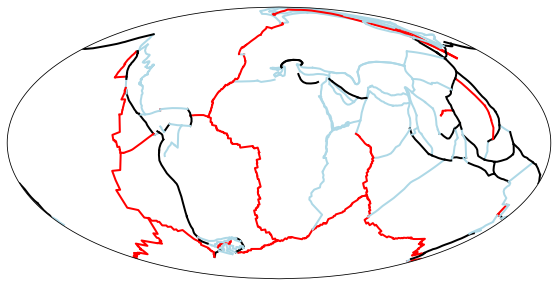

In [7]:
M2019 = Reconstructions.fetch_Muller2019()

tmp = M2019.plate_snapshot(20)
tmp.plot()

<GeoAxesSubplot:>

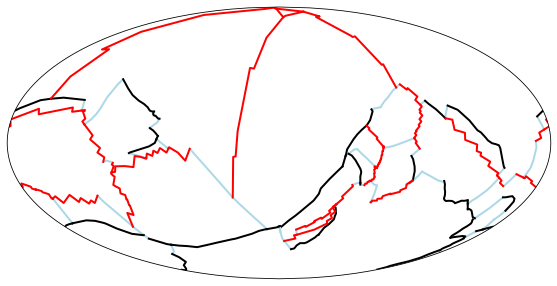

In [8]:
M2021 = Reconstructions.fetch_Merdith2021()

tmp = M2021.plate_snapshot(550)
tmp.plot()

<GeoAxesSubplot:>

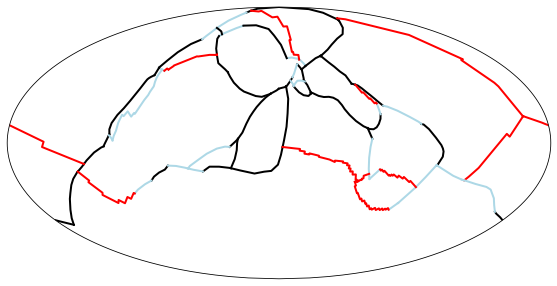

In [9]:
Ma2016 = Reconstructions.fetch_Matthews2016()

tmp = Ma2016.plate_snapshot(350, anchor_plate_id=0)
tmp.plot()

<GeoAxesSubplot:>

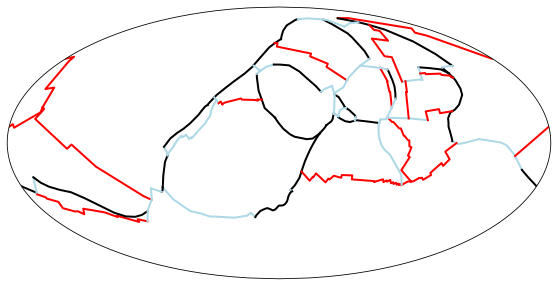

In [10]:
Y2019 = Reconstructions.fetch_Young2019()

tmp = Y2019.plate_snapshot(350, anchor_plate_id=0)
tmp.plot()

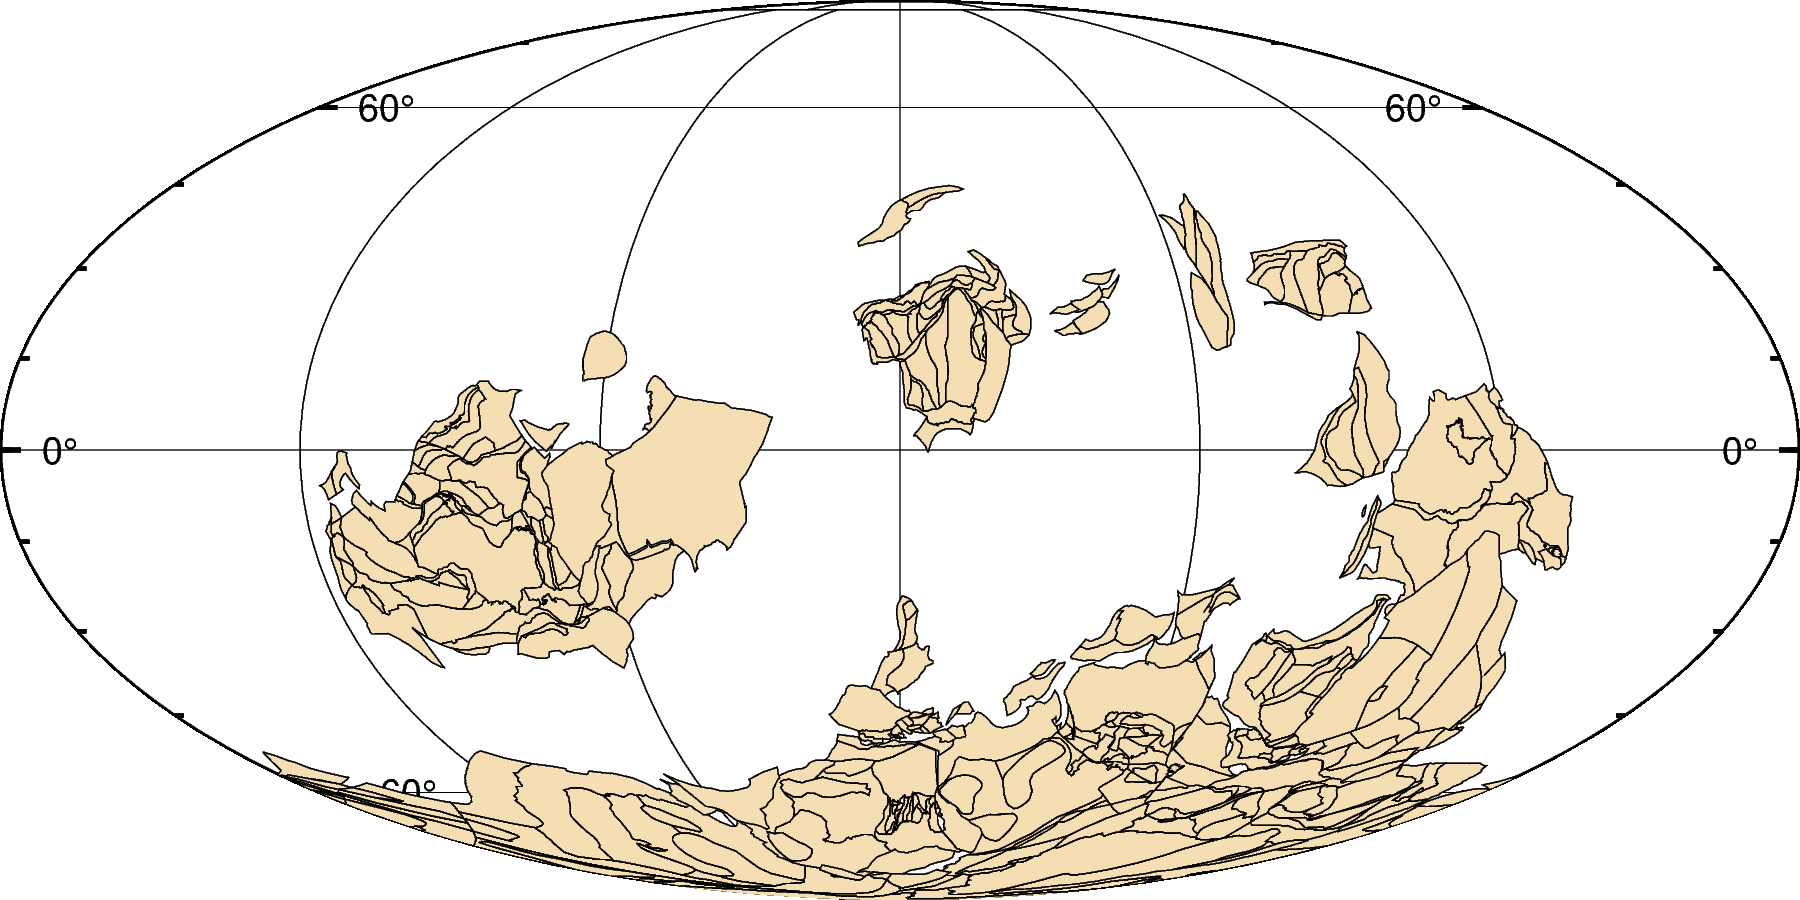

In [11]:
reconstruction_time = 420.
reconstructed_continents = M2021.polygon_snapshot('continents', reconstruction_time)
#reconstructed_plates = M2021.plate_snapshot(reconstruction_time)

fig = pygmt.Figure()
fig.basemap(region='d', projection='W6i', frame='afg')
reconstructed_continents.plot2(fig, color='wheat')
#reconstructed_plates.plot_subduction_zones(fig)
#reconstructed_plates.plot_mid_ocean_ridges(fig)
#reconstructed_plates.plot_other_boundaries(fig)
fig.show(width=800)


In [12]:
import fiona; fiona.supported_drivers

{'AeronavFAA': 'r',
 'ARCGEN': 'r',
 'BNA': 'rw',
 'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'rw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'rw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'GPSTrackMaker': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'rw',
 'OGR_PDS': 'r',
 'S57': 'r',
 'SEGY': 'r',
 'SUA': 'r',
 'TopoJSON': 'r'}

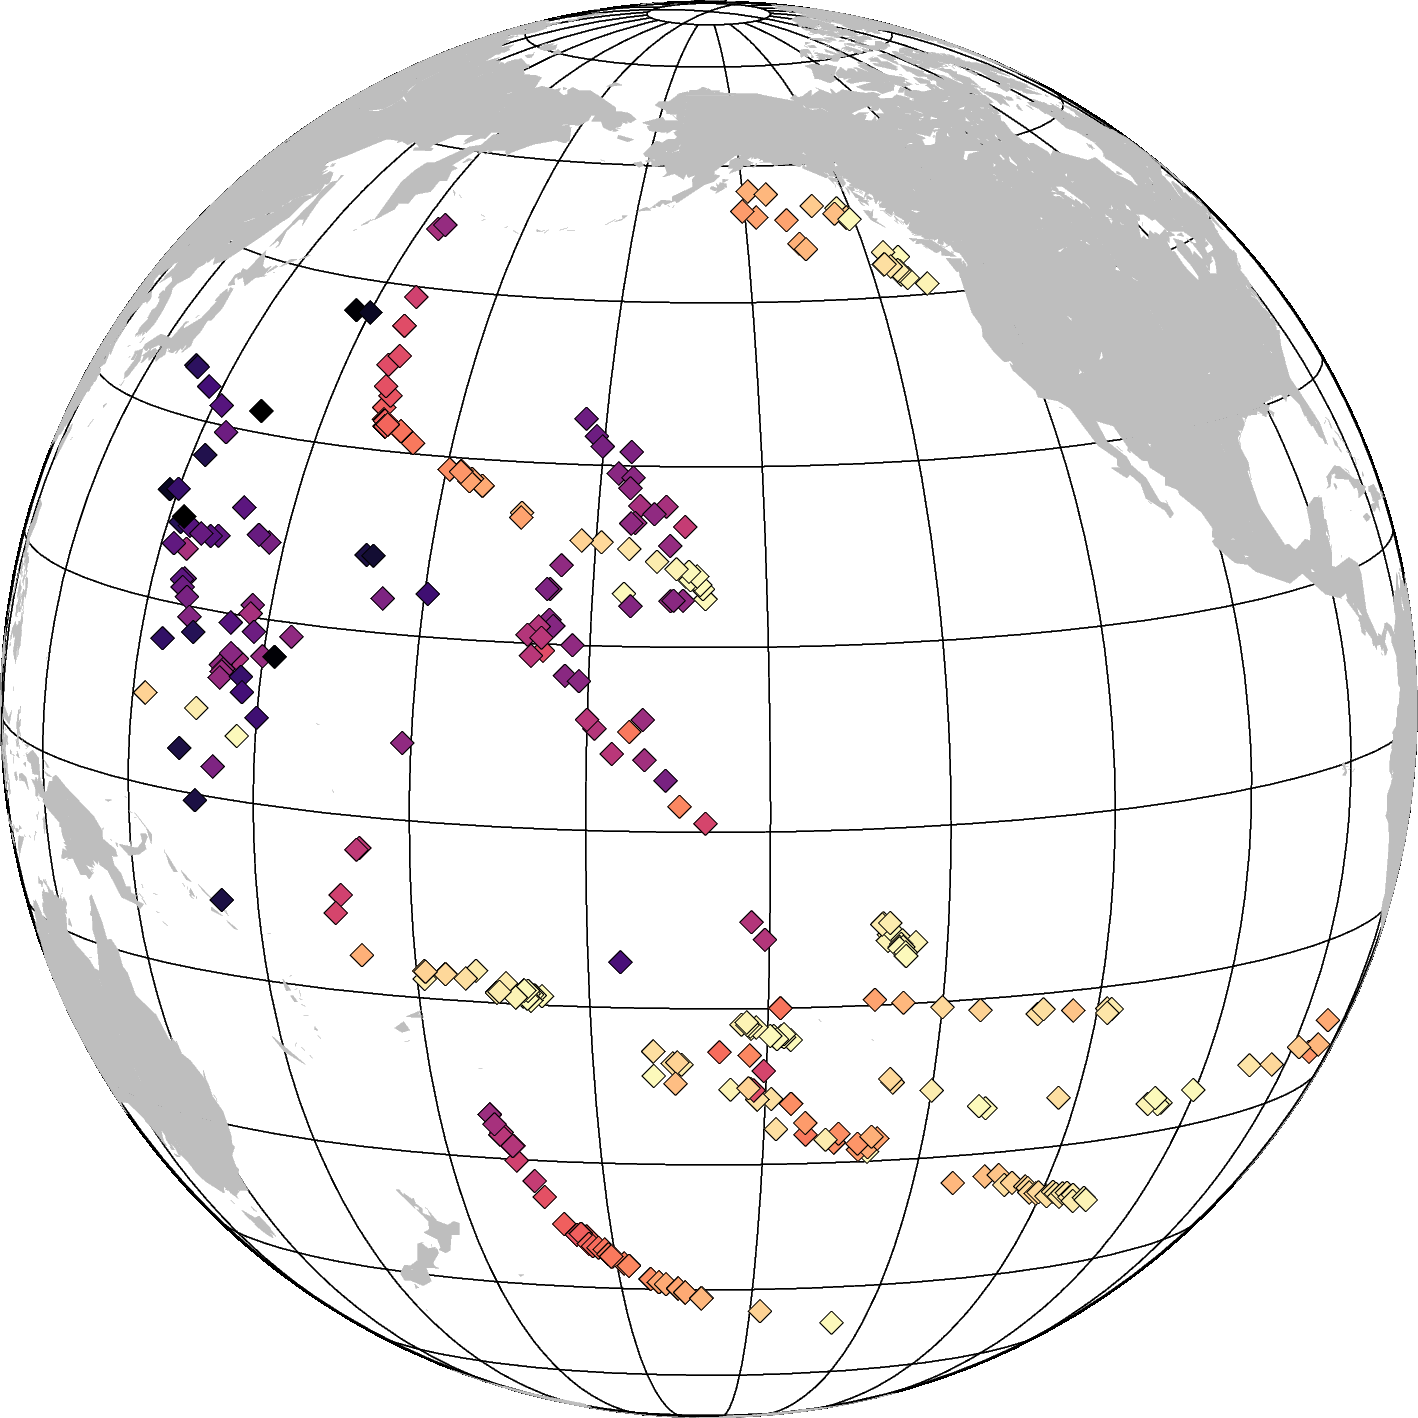

In [14]:
PacificSeamountAges = Seafloor.PacificSeamountAges()

fig = pygmt.Figure()

fig.basemap(frame='afg', region='d', projection='G-155/10/12c')

fig.coast(land='grey')
pygmt.makecpt(cmap='magma', series='0/140/2', reverse=True)
fig.plot(x=PacificSeamountAges.Long, y=PacificSeamountAges.Lat, 
         color = PacificSeamountAges.Average_Age_Ma, 
         style='d0.2c',
         cmap=True,
         pen='0.05p,black',)

fig.show(width=700)


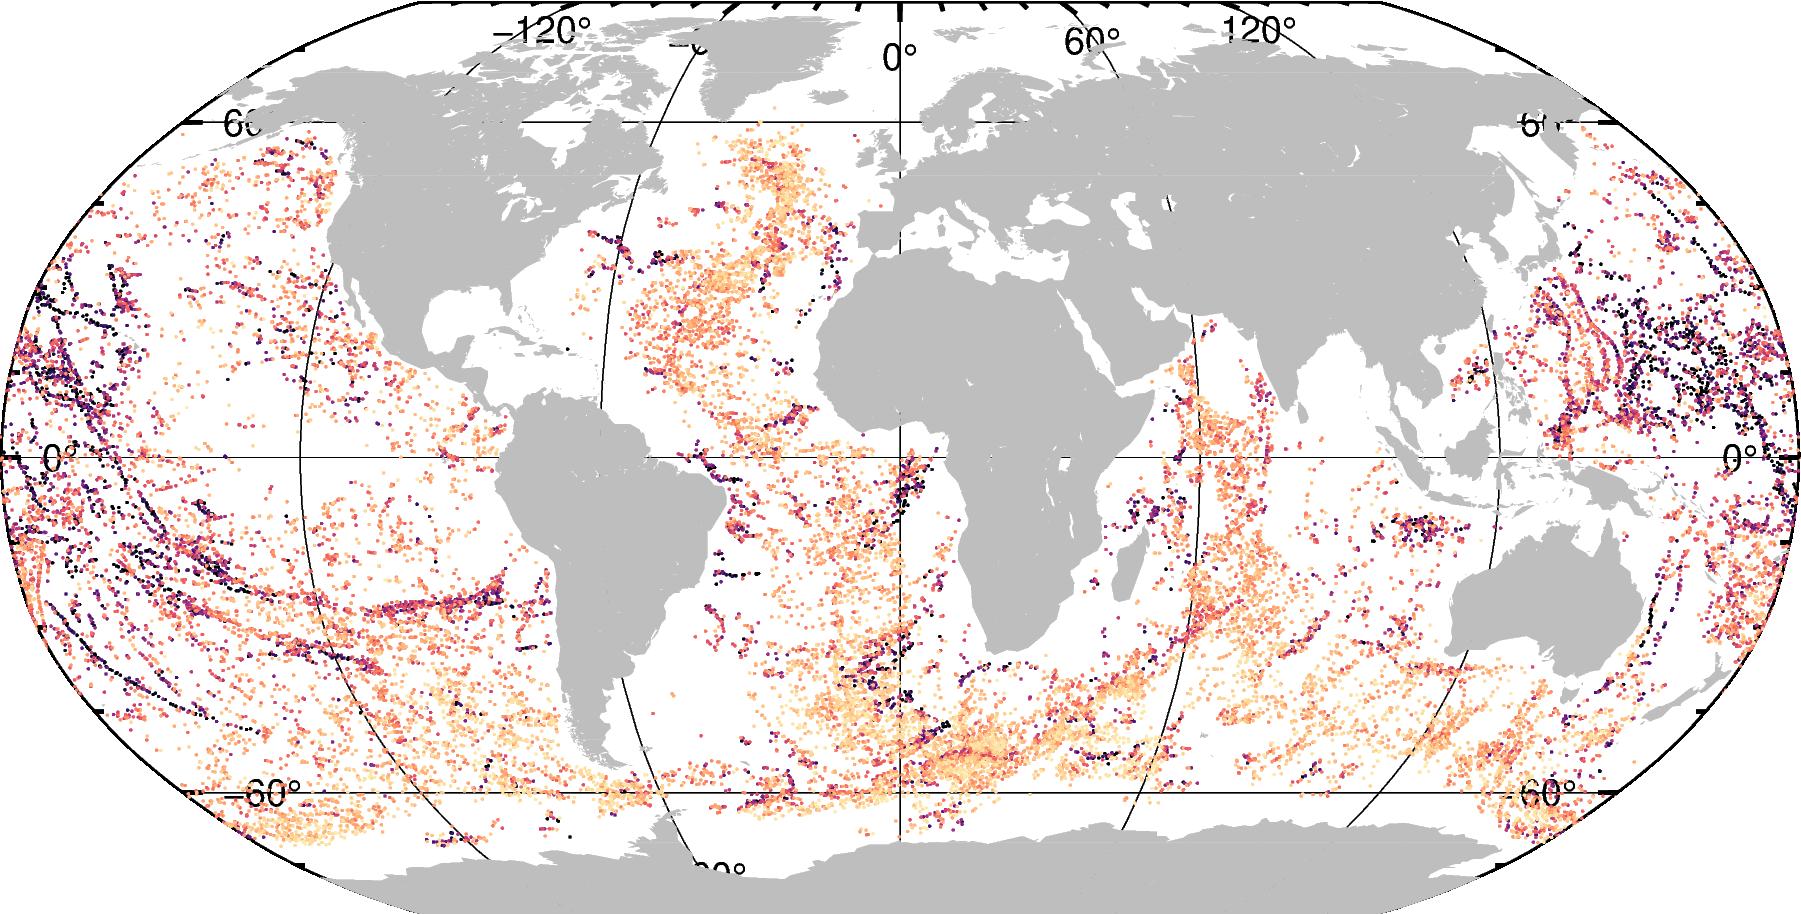

In [15]:
Seamounts = SeafloorSeafloor.Seamounts()

fig = pygmt.Figure()

fig.basemap(frame='afg', region='d', projection='N6i')

fig.coast(land='grey')
pygmt.makecpt(cmap='magma', series='0/3000', reverse=True)
fig.plot(x=Seamounts.Long, y=Seamounts.Lat, 
         color = Seamounts.Height, 
         style='c0.025c',
         cmap=True,)

fig.show(width=900)


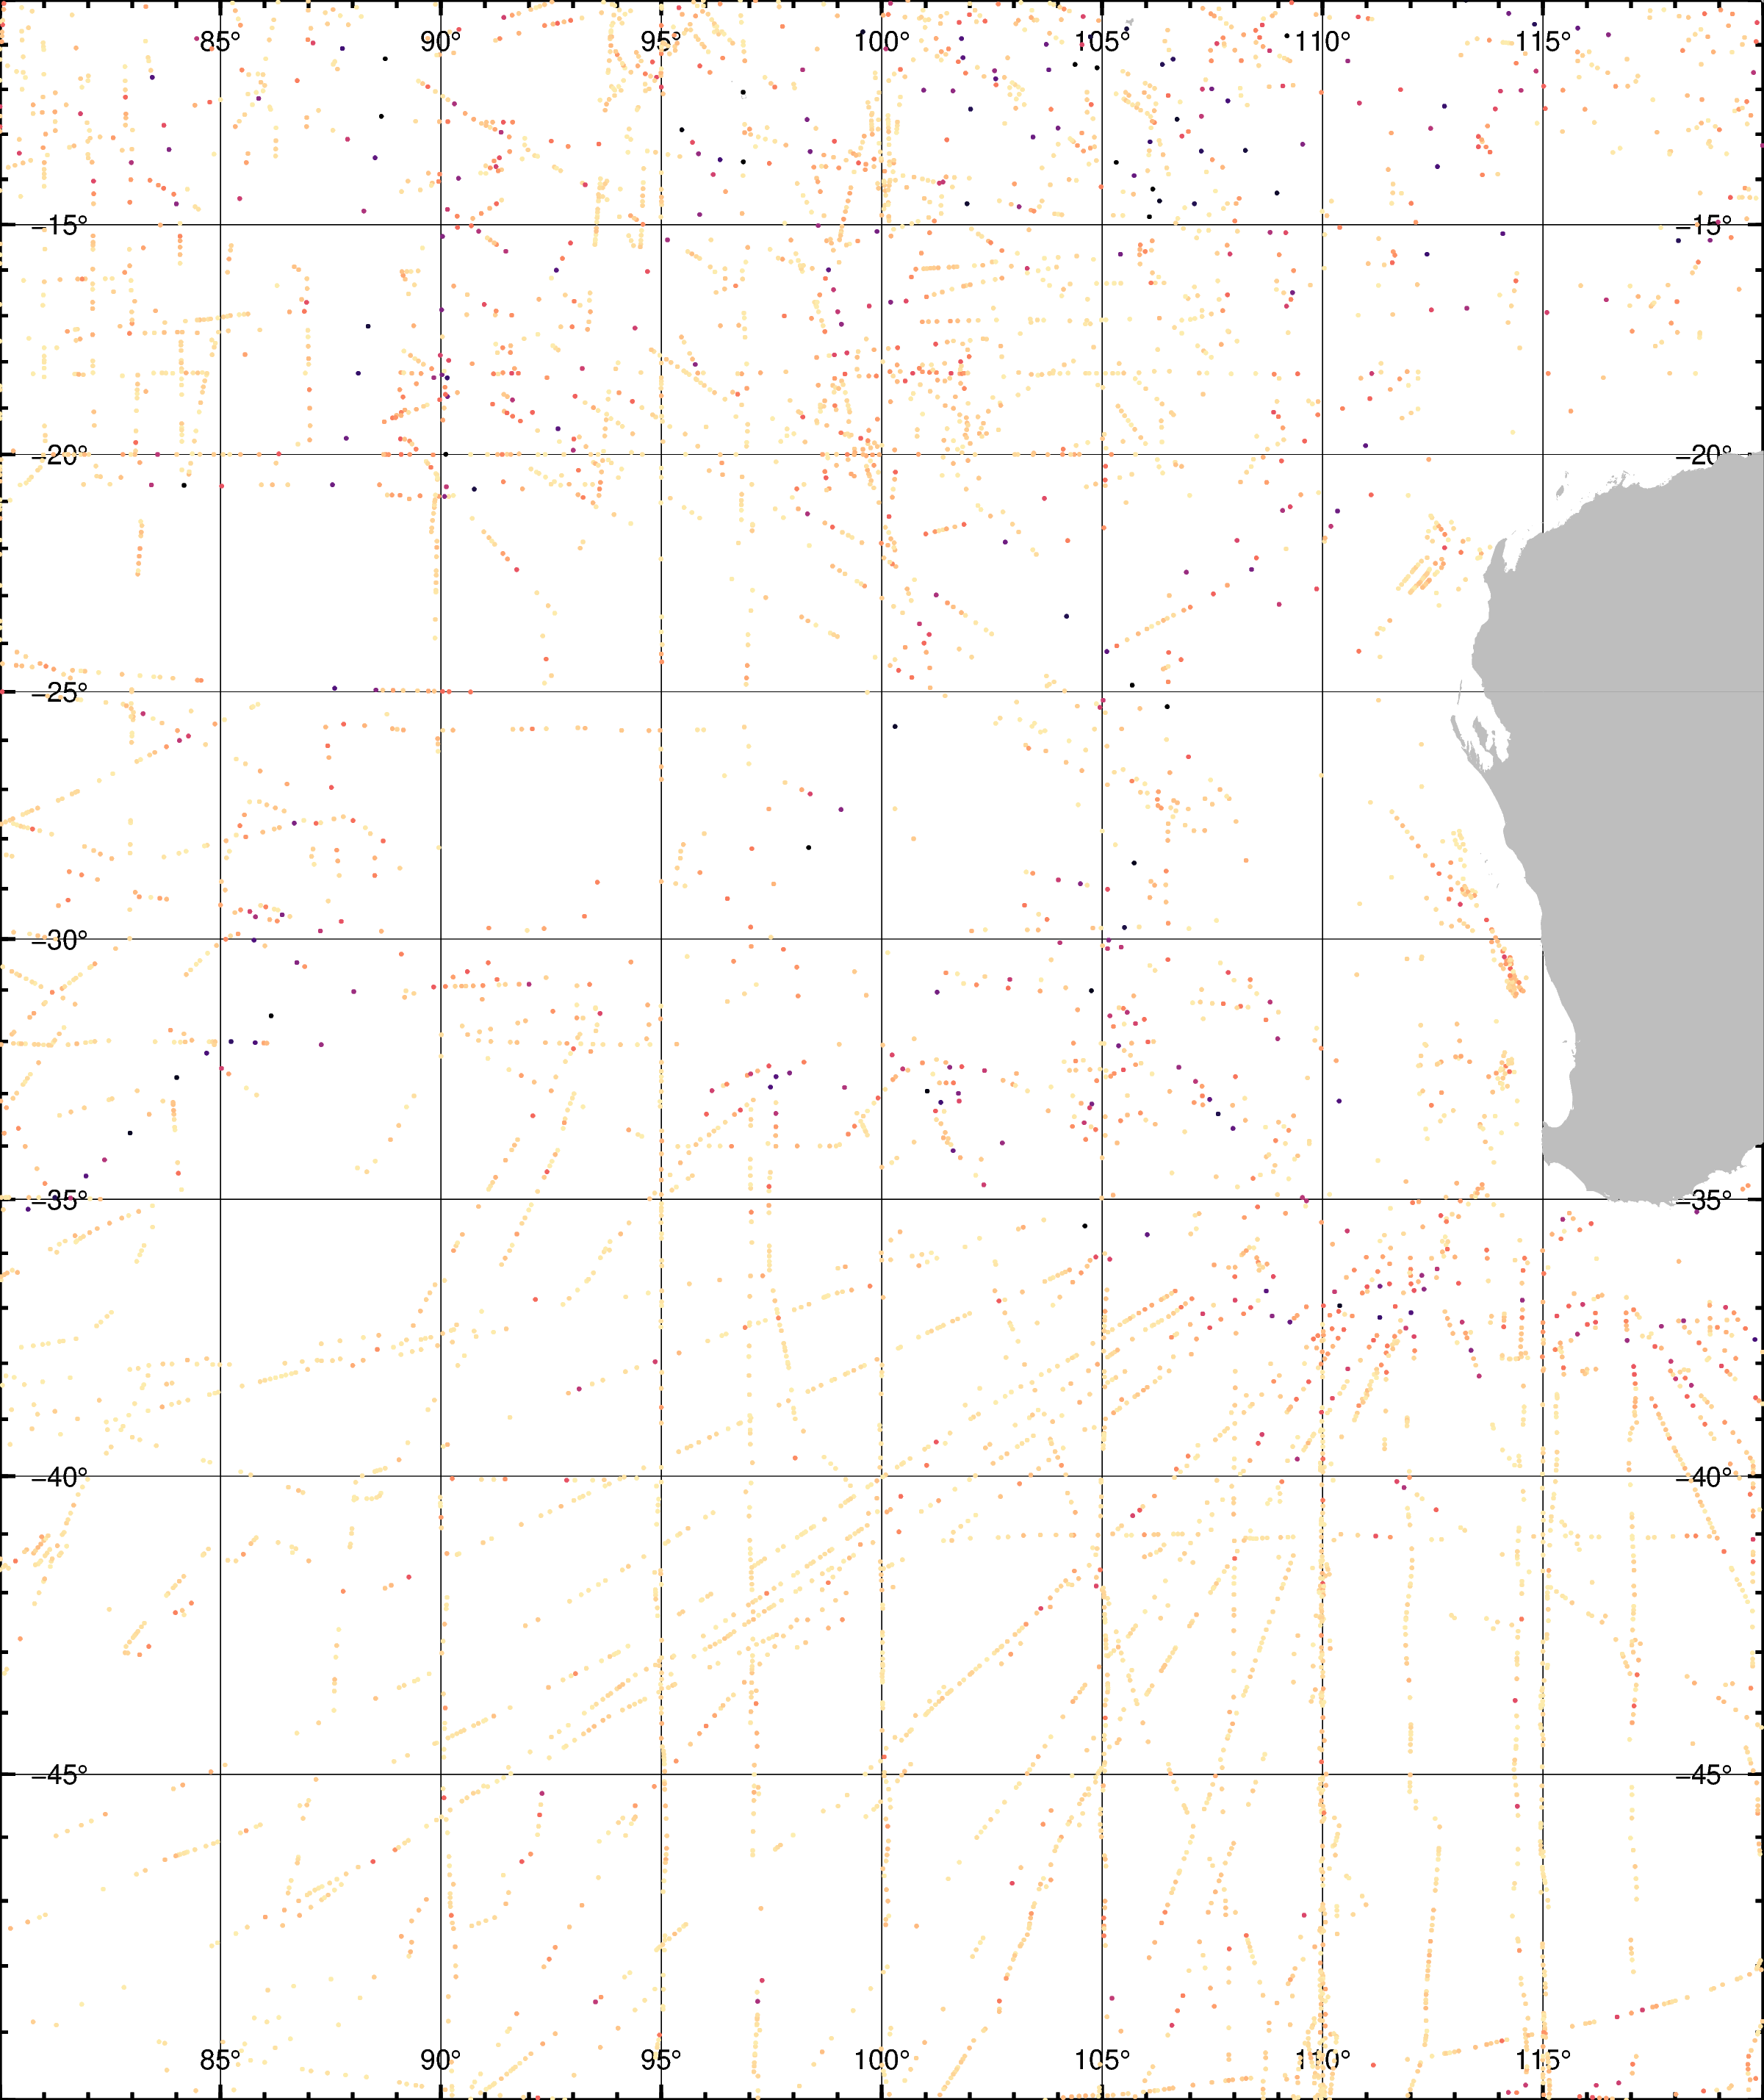

In [16]:
Seamounts = Seafloor.Seamounts(catalogue='HW')

fig = pygmt.Figure()

#fig.basemap(frame='afg', region='d', projection='N12i')
fig.basemap(frame='afg', region='80/120/-50/-10', projection='M8i')

fig.coast(land='grey')
pygmt.makecpt(cmap='magma', series='0/3000', reverse=True)
fig.plot(x=Seamounts.Long, y=Seamounts.Lat, 
         color = Seamounts.Height, 
         style='c0.05c',
         cmap=True,)

fig.show(width=1000)


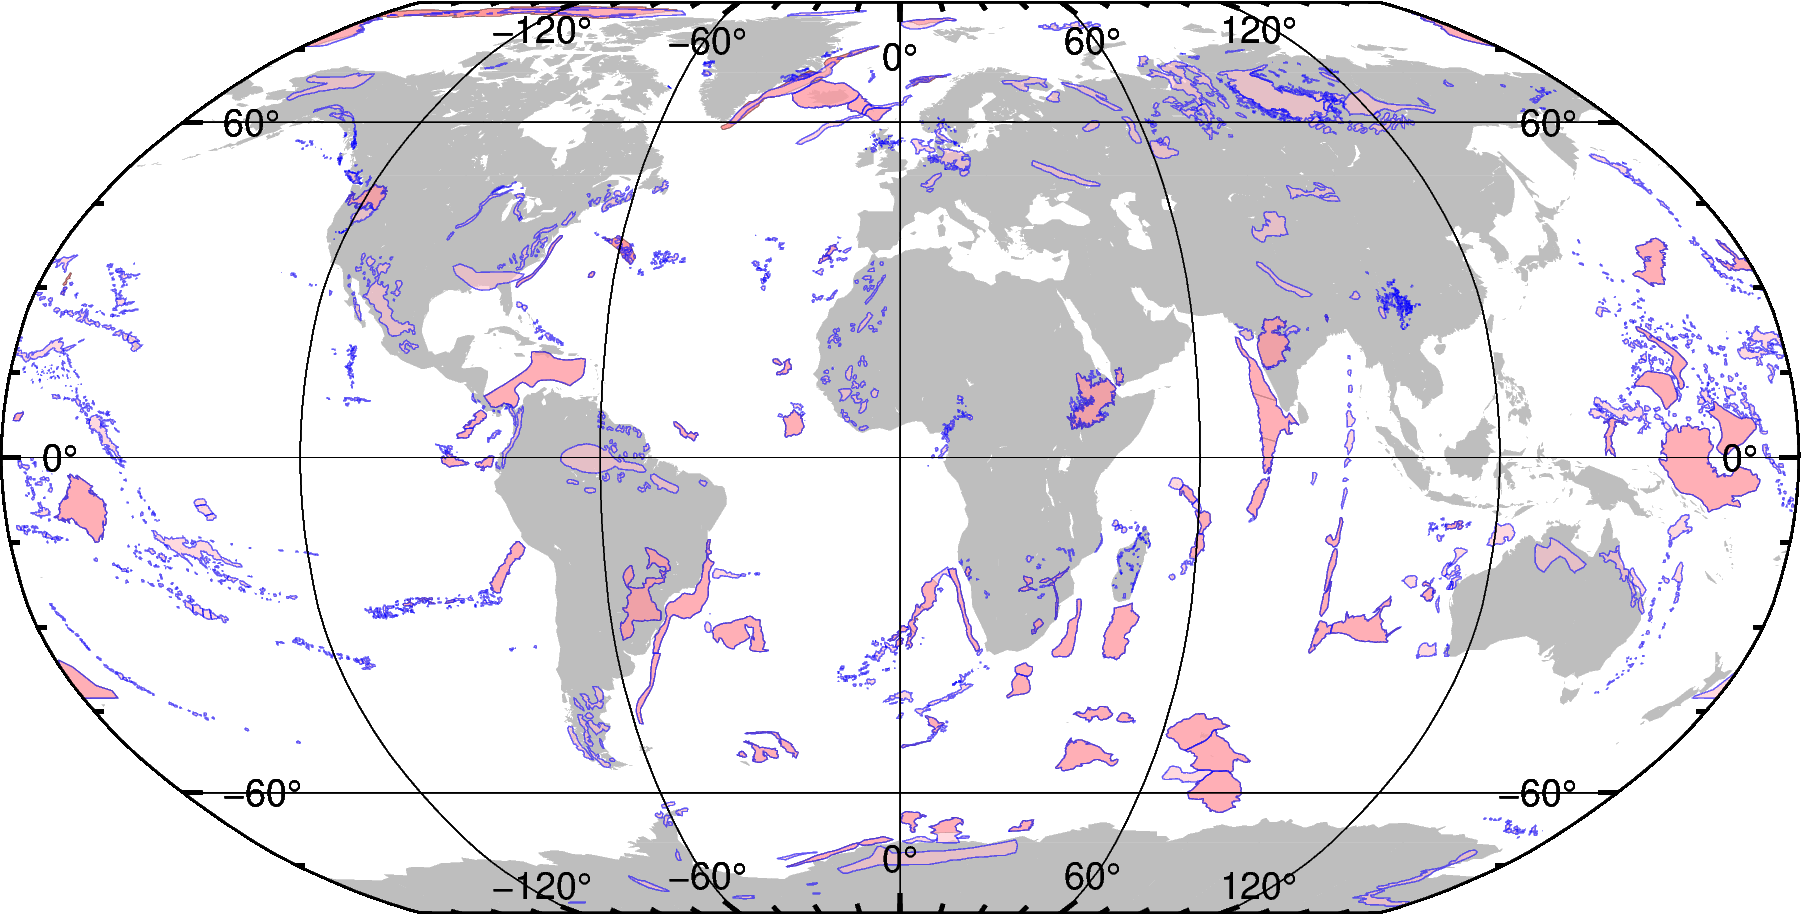

In [17]:
LIPs = Seafloor.LargeIgneousProvinces(load=False)
LIPs2 = Seafloor.LargeIgneousProvinces(load=False, catalogue='Johansson')
LIPs3 = Seafloor.LargeIgneousProvinces(load=False, catalogue='UTIG')
fig = pygmt.Figure()

fig.basemap(frame='afg', region='d', projection='N6i')

fig.coast(land='grey')
fig.plot(data=LIPs, color='red', pen='0.1p,black', transparency=60)
fig.plot(data=LIPs2, color='pink', transparency=40)
fig.plot(data=LIPs2, pen='0.2p,blue', transparency=40)
fig.basemap(frame='afg')
fig.show(width=900)


In [18]:
from gprm.datasets import Zircons

df_SampleDetails, df_Data = Zircons.loadDB()



/opt/anaconda3/envs/pygmt/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [19]:
SedimentaryZircons = Zircons.get_sedimentary_samples(df_SampleDetails,df_Data)
IgneousZircons = Zircons.get_igneous_samples(df_SampleDetails,df_Data)

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [ ]:
fig = pygmt.Figure()

fig.basemap(frame='afg', region='d', projection='N6i')
fig.coast(land='grey')
#fig.plot(x=IgneousZircons.Longitude, y=IgneousZircons.Latitude,
#         style='c0.1c', color='red', pen='0.02p,black', transparency=60)
fig.plot(x=SedimentaryZircons.Longitude, y=SedimentaryZircons.Latitude,
         style='c0.1c', color=SedimentaryZircons['Est_Depos_Age_Ma']/1000., pen='0.02p,black', transparency=60, cmap='magma')
fig.basemap(frame='afg')

fig.show(width=900)



In [ ]:
kimberlites = Rocks.Kimberlites()

fig = pygmt.Figure()

fig.basemap(frame='afg', region='d', projection='N6i')

fig.coast(land='grey')
fig.plot(x=kimberlites.Longitude, y=kimberlites.Latitude,
         style='d0.1c', color=kimberlites.Age1_Ma/500., pen='0.1p,black', cmap='magma', transparency=20)
fig.basemap(frame='afg')
fig.show(width=900)
